<a href="https://colab.research.google.com/github/Niha002/AI-class/blob/main/Hw3_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SVM

In [2]:
# 1.	Standard Imports 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()

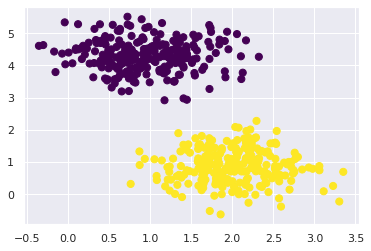

In [28]:
# 2.	Introduction 
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.50)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');

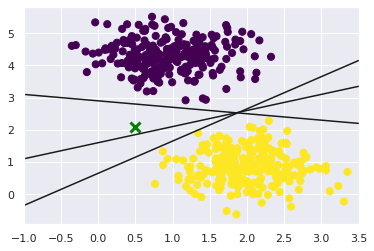

In [35]:
# Line to seperate the two groups
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.plot([0.5], [2.1], 'x', color='green', markeredgewidth=3, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

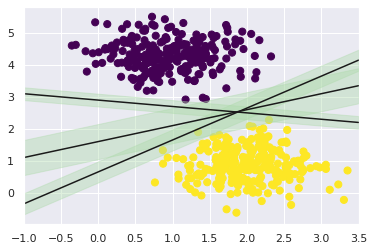

In [33]:
# 3.	Maximizing the Margin with SVM
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#ADDAAA', alpha=0.4)

plt.xlim(-1, 3.5);

array([[1.44779312, 2.93394874],
       [1.34430759, 1.8966417 ],
       [2.29582508, 2.27734122]])

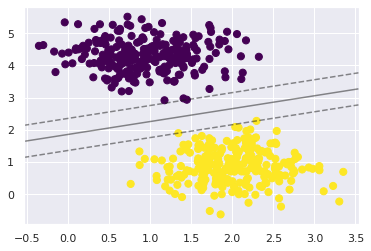

In [37]:
# 4.	Fitting a Support Vector Machine
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plot_svc_decision_function(model);

# the dots touching the margin become SV
model.support_vectors_

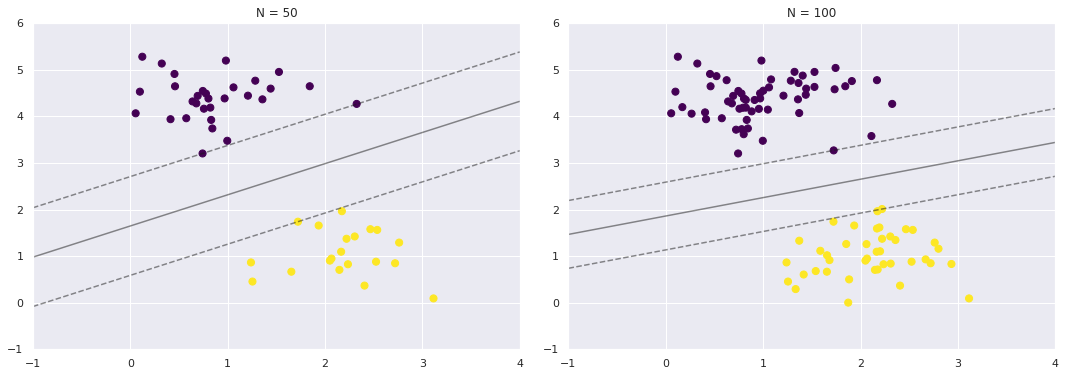

In [48]:
def plot_svm(N=100, ax=None):
    X, y = make_blobs(n_samples=500, centers=2,
                      random_state=0, cluster_std=0.50)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [50, 100]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))


In [49]:
# Interactive plot
from ipywidgets import interact, fixed
interact(plot_svm, N=[10, 40, 200, 400], ax=fixed(None));

interactive(children=(Dropdown(description='N', options=(10, 40, 200, 400), value=10), Output()), _dom_classes…

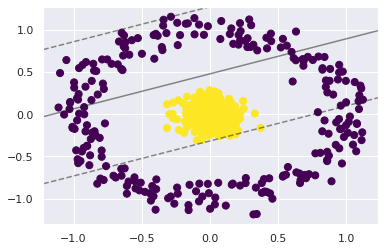

In [57]:
# 5.	Beyond linear boundaries: Kernel SVM
# from sklearn.datasets.samples_generator import make_circles
# !pip3 install -U scikit-learn
from sklearn.datasets import make_circles
from sklearn import svm
X, y = make_circles(500, factor=.1, noise=.1)

clf = svm.SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plot_svc_decision_function(clf, plot_support=False);

In [61]:
# Project the dimension
r = np.exp(-(X ** 2).sum(1))

from mpl_toolkits import mplot3d

def plot_3D(elev=730, azim=10, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='viridis')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180),
         X=fixed(X), y=fixed(y));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=10, descript…

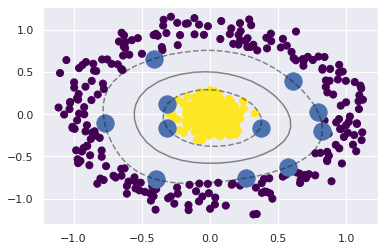

In [69]:
# Kernel method 
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1);


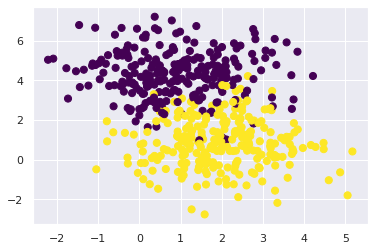

In [72]:
# 6.	Tuning the SVM: Softening Margins
X, y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis');


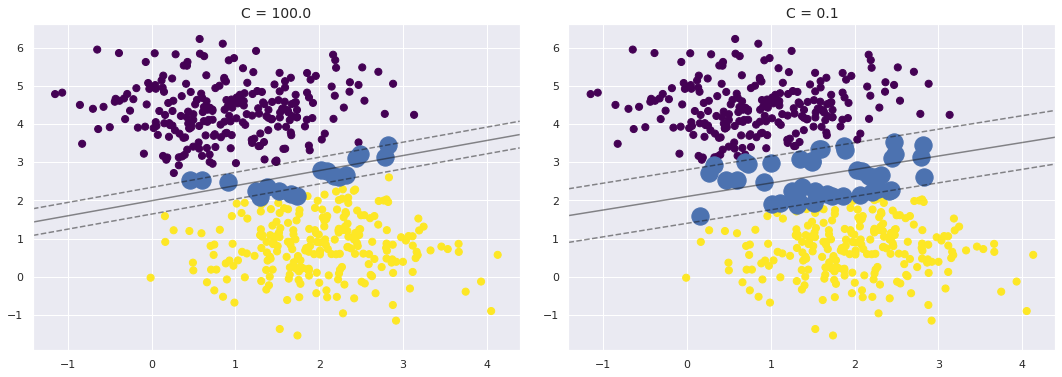

In [75]:
X, y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [100.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1);
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Face Recognition

In [79]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=100)
print(faces.target_names)
print(faces.images.shape)


['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']
(1140, 62, 47)


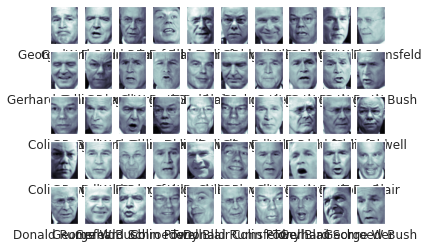

In [84]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(5, 10)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [85]:
from sklearn.svm import SVC
#from sklearn.decomposition import RandomizedPCA  # Old version
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

#from sklearn.cross_validation import train_test_split # Old version
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

#from sklearn.grid_search import GridSearchCV   #Old version
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)


CPU times: user 33.3 s, sys: 13.3 s, total: 46.6 s
Wall time: 24 s
{'svc__C': 5, 'svc__gamma': 0.005}


In [86]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

                   precision    recall  f1-score   support

     Colin Powell       0.92      0.94      0.93        64
  Donald Rumsfeld       0.96      0.81      0.88        32
    George W Bush       0.90      0.98      0.94       127
Gerhard Schroeder       0.89      0.83      0.86        29
       Tony Blair       0.96      0.82      0.89        33

         accuracy                           0.92       285
        macro avg       0.93      0.87      0.90       285
     weighted avg       0.92      0.92      0.91       285



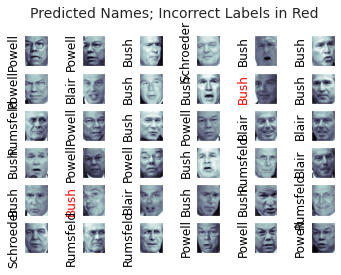

In [89]:
# Testing
fig, ax = plt.subplots(6, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))


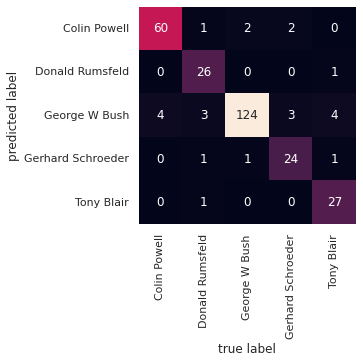

In [90]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
